In [36]:
import pickle as pk
import numpy as np
import torch
from atom3d.util.metrics import auroc
from scipy.stats import pearsonr
from sklearn.utils.multiclass import type_of_target
import matplotlib.pyplot as plt

with open('../test_preds_msp.pkl', 'rb') as file:
    # Load the data from the pickle file
    test_preds = pk.load(file)


In [37]:
binary_predictions = (test_preds >= 0).int()

In [38]:
binary_predictions

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],

In [39]:
with open('../atom3d_processing/data_msp.pk', 'rb') as file:
        full_dataset =  pk.load(file)
    
    # full_dataset = LMDBDataset('data/msp/raw/MSP/data/')
    # import pdb; pdb.set_trace()
    # full_dataset = [x for x in full_dataset if x.num_nodes < 1000]
    # print(len(full_dataset))
    #Convert the list of 0s and 1s target strings to integers and a torch tensor
for data in full_dataset:
    y = torch.tensor([int(label) for label in data.y]).float()
    data.y = y
    
# import pdb; pdb.set_trace()
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])
test_targets = np.array([data.y for data in val_set])

/tmp/ipykernel_3903036/4026533608.py:17: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  test_targets = np.array([data.y for data in val_set])
/tmp/ipykernel_3903036/4026533608.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_targets = np.array([data.y for data in val_set])


In [40]:
val_set[0]

Data(x=[478, 20], edge_index=[2, 1712], edge_attr=[1712], y=[1], pos=[478, 3])

In [41]:
test_targets = test_targets.astype(int)

In [42]:
test_targets

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [43]:
def compute_accuracy(y_true, y_pred_probs, threshold=0.5):
    # Convert predicted probabilities to binary predictions
    y_pred_binary = (y_pred_probs > threshold).astype(int)
    print(y_pred_binary)
    # print(y_true)
    # Compare binary predictions with true values
    correct_predictions = np.sum(y_pred_binary == y_true)

    # Compute accuracy
    accuracy = correct_predictions / len(y_true)
    
    return accuracy

In [44]:
test_auroc = auroc(test_targets, binary_predictions)
test_auroc

0.5

In [45]:
test_targets.shape

(830,)

In [46]:
test_preds = test_preds.numpy()

In [47]:
test_preds = test_preds.reshape(830,)

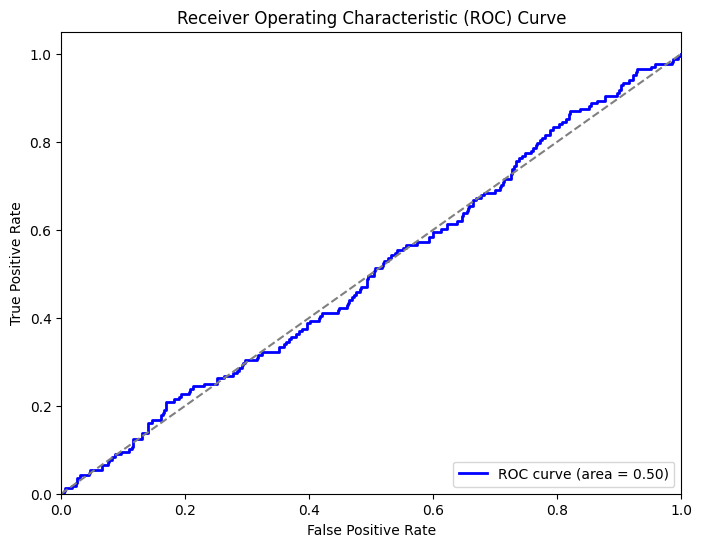

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'y_true' contains the true labels (0 or 1) and 'sigmoid_values' contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(test_targets, test_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
test_targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [49]:
compute_accuracy(test_targets, test_preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

0.7975903614457831

In [15]:
from atom3d.util.metrics import auroc
from scipy.stats import pearsonr
mse = np.mean((test_targets - test_preds) ** 2)

TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Tensor'

In [20]:
loaded_tensor = torch.load('/gpfs/gibbs/pi/krishnaswamy_smita/sv496/progsnn_att/att_map_col_0.pth')

In [23]:
loaded_tensor[0].shape

torch.Size([1, 1, 220, 220])

In [25]:
loaded_tensor[0][0][0].shape

torch.Size([220, 220])

In [26]:
import seaborn as sns

In [28]:
amino_acids = ['ALA', 'CYS', 'ASP', 'GLU', 'PHE', 'GLY', 'HIS', 'ILE', 'LYS', 'LEU', 'MET', 'ASN', 'PRO', 'GLN', 'ARG',
                'SER', 'THR', 'VAL', 'TRP', 'TYR']

In [61]:
reshaped_tensor = loaded_tensor[0][0][0].reshape(20, 11, 20, 11)

In [64]:
reshaped_tensor

tensor([[[[0.0050, 0.0046, 0.0050,  ..., 0.0049, 0.0052, 0.0045],
          [0.0049, 0.0050, 0.0049,  ..., 0.0049, 0.0046, 0.0045],
          [0.0046, 0.0046, 0.0046,  ..., 0.0045, 0.0046, 0.0046],
          ...,
          [0.0045, 0.0045, 0.0045,  ..., 0.0045, 0.0045, 0.0045],
          [0.0044, 0.0045, 0.0044,  ..., 0.0044, 0.0044, 0.0044],
          [0.0044, 0.0044, 0.0044,  ..., 0.0044, 0.0044, 0.0044]],

         [[0.0047, 0.0046, 0.0047,  ..., 0.0047, 0.0048, 0.0045],
          [0.0047, 0.0047, 0.0047,  ..., 0.0047, 0.0046, 0.0045],
          [0.0046, 0.0046, 0.0046,  ..., 0.0045, 0.0046, 0.0046],
          ...,
          [0.0045, 0.0045, 0.0045,  ..., 0.0045, 0.0045, 0.0045],
          [0.0045, 0.0045, 0.0045,  ..., 0.0045, 0.0045, 0.0045],
          [0.0045, 0.0045, 0.0045,  ..., 0.0045, 0.0045, 0.0045]],

         [[0.0050, 0.0046, 0.0050,  ..., 0.0049, 0.0051, 0.0045],
          [0.0050, 0.0049, 0.0049,  ..., 0.0048, 0.0046, 0.0045],
          [0.0046, 0.0046, 0.0046,  ..., 0

In [65]:
aggregated_tensor = reshaped_tensor.sum(axis=(1, 3))

In [66]:
aggregated_tensor.shape

torch.Size([20, 20])

In [67]:
aggregated_tensor[0]

tensor([0.5831, 0.5852, 0.5543, 0.5564, 0.5546, 0.5562, 0.5534, 0.5519, 0.5518,
        0.5422, 0.5413, 0.5414, 0.5415, 0.5408, 0.5413, 0.5417, 0.5414, 0.5411,
        0.5403, 0.5401])

In [53]:
row_sums = aggregated_tensor.sum(axis=0)

In [54]:
row_sums

tensor([11.2143, 11.2272, 11.0286, 11.0426, 11.0310, 11.0409, 11.0231, 11.0133,
        11.0122, 10.9489, 10.9430, 10.9438, 10.9448, 10.9396, 10.9435, 10.9460,
        10.9437, 10.9420, 10.9364, 10.9350])

In [58]:
import torch

# Calculate the variance along the row dimension
variances = torch.var(aggregated_tensor, dim=1)

# Find the index of the row with the maximum variance
max_variance_row_index = torch.argmax(variances)

# Get the row with the highest variance
row_with_highest_variance = aggregated_tensor[max_variance_row_index]

print(row_with_highest_variance)


tensor([0.5858, 0.5882, 0.5546, 0.5569, 0.5550, 0.5566, 0.5537, 0.5521, 0.5519,
        0.5415, 0.5406, 0.5407, 0.5409, 0.5400, 0.5407, 0.5411, 0.5407, 0.5404,
        0.5395, 0.5393])


/tmp/ipykernel_1048220/1620709096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amino_acids, y=row_with_highest_variance, palette='viridis')


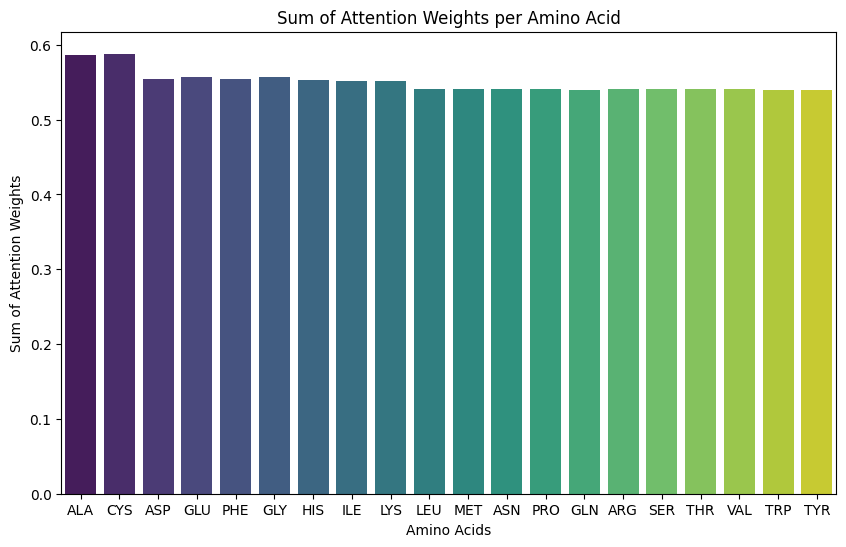

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=amino_acids, y=row_with_highest_variance, palette='viridis')
plt.xlabel('Amino Acids')
plt.ylabel('Sum of Attention Weights')
plt.title('Sum of Attention Weights per Amino Acid')
plt.show()

<Axes: >

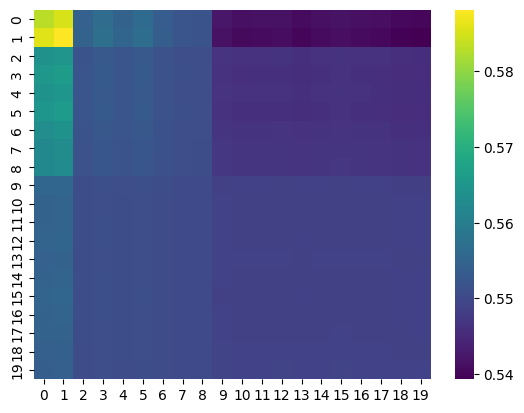

In [59]:
sns.heatmap(aggregated_tensor, cmap='viridis')